In [2]:
import numpy as np
import pandas as pd
import scipy as sc
%pylab inline

from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

Populating the interactive namespace from numpy and matplotlib


C:\Users\Yaroslav\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Data: Methylphenidate

You have already seen this dataset in videos: 24 children with ADHD had their performance measured on delay of gratification (DOG) task 60 minutes after taking Methylphenidate, and, on a different week, after taking placebo.

We want to estimate the effect of the drug.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [3]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

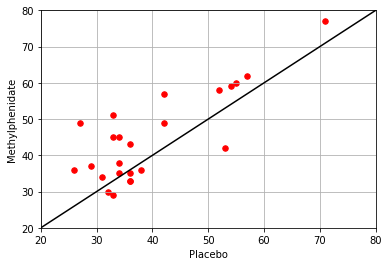

In [4]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80));

## One sample

Assuming delay of gratification task test is well-calibrated, average score in the general population is 50. Do children with ADHD have the same average score? 

In [5]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Placebo).tconfint_mean())

95% confidence interval: [34.972234, 44.527766]


$H_0\colon$ average DOG task score for children with ADHD is 50.

$H_1\colon$ average DOG task score for children with ADHD is not 50.

In [6]:
print('T test:', sc.stats.ttest_1samp(data.Placebo, 50.0))

T test: Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)


In [20]:
# z-test example
mean, stdev = 9.5, 0.4
z_score = (9.57 - mean) * np.sqrt(160) / stdev
# two-sided
round(2*sc.stats.norm.cdf(-z_score), 4)

0.0269

## Two paired samples

Before using t-test and corresponding confidence interval, let's look at q-q plot for pairwise differences to make sure there are no gross deviations from normality:

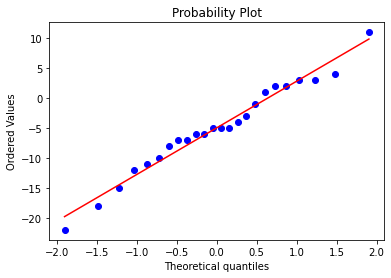

In [8]:
sc.stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

In [9]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean())

95% confidence interval: [1.775236, 8.141431]


$H_0\colon$ average test scores are equal for patients after drug and after placebo.

$H_0\colon$ not equal.

In [10]:
print('T test:', sc.stats.ttest_rel(data.Methylphenidate, data.Placebo))

T test: Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)


## Two independent samples

Just for you to have an example of the code, let's analyze these samples as if they were independent (which is, of course, false - they are paired!). 

Before using t-test and corresponding confidence interval, let's look at q-q plots to make sure there are no gross deviations from normality:

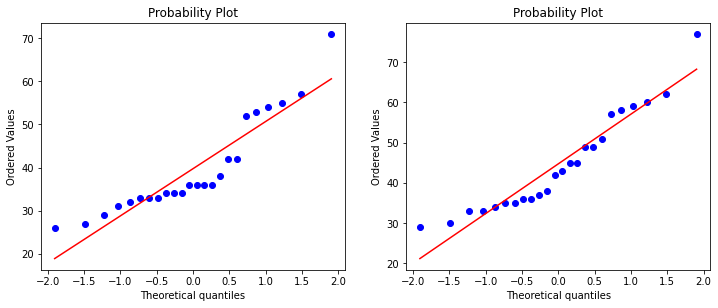

In [11]:
pylab.figure(figsize=(12,10))
pylab.subplot(2,2,1)
sc.stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
sc.stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

In [12]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-1.915927, 11.832593]


$H_0\colon$ average test scores are equal for patients after drug and after placebo.

$H_0\colon$ not equal.

In [13]:
print('T test:', sc.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False))

T test: Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)


### Data: Diamond prices (Homework)

In [22]:
data = pd.read_csv('diamond_prices.csv')
data.head()

price  predicted_price_lm  predicted_price_gbdt
0    564          747.149466            799.049243
1   5914         6644.569397           6635.491541
2   2562         2096.573114           2138.584133
3    537          727.031366            694.107710
4   5964         7180.988674           7425.353560

In [26]:
data['MAE_lm'] = abs(data['price'] - data['predicted_price_lm'])
data['MAE_gbdt'] = abs(data['price'] - data['predicted_price_gbdt'])

mae_lm = data['MAE_lm'].sum() / len(data)
mae_gbdt = data['MAE_gbdt'].sum() / len(data)

round(mae_gbdt - mae_lm, 2)

-6.88

In [32]:
sc.stats.ttest_rel(data['MAE_lm'], data['MAE_gbdt'])

Ttest_relResult(statistic=2.382783477618914, pvalue=0.017196067393118585)

In [33]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data['MAE_lm'] - data['MAE_gbdt']).tconfint_mean())

95% confidence interval: [1.219561, 12.531740]


In [34]:
import matplotlib.pyplot as plt

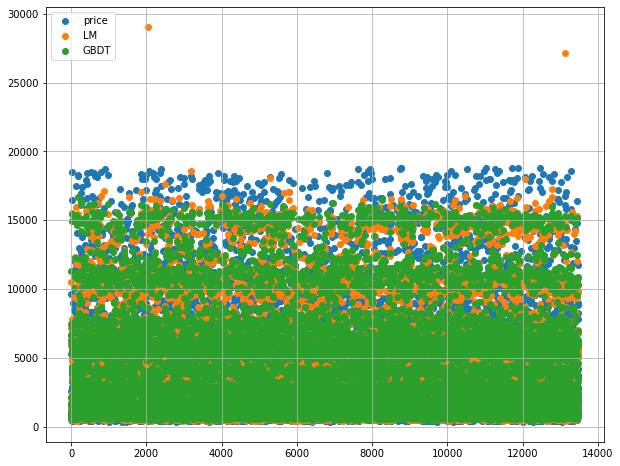

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(data.index, data['price'], label='price')
plt.scatter(data.index, data['predicted_price_lm'], label='LM')
plt.scatter(data.index, data['predicted_price_gbdt'], label='GBDT')
plt.legend()
plt.grid()
plt.show()